### Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn model building
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                                roc_auc_score, roc_curve,precision_score, recall_score,
                             f1_score, ConfusionMatrixDisplay)

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import shap


In [11]:
df_model = pd.read_csv('../data/processed/df_model.csv')

In [12]:
df_model = df_model.apply(pd.to_numeric, errors='coerce')

# Step 4: Fill any missing values
df_model = df_model.fillna(0)

In [13]:
x = df_model.drop('study_status', axis=1)
y = df_model['study_status']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                     random_state=1,
                                                      stratify=y )

In [15]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Train Baseline Models

Model: Logistic Regression
Accuracy: 0.81
ROC_AUC_Score: 0.82
Counfusion Matrix:
 [[  86  220]
 [  29 1001]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.28      0.41       306
           1       0.82      0.97      0.89      1030

    accuracy                           0.81      1336
   macro avg       0.78      0.63      0.65      1336
weighted avg       0.80      0.81      0.78      1336



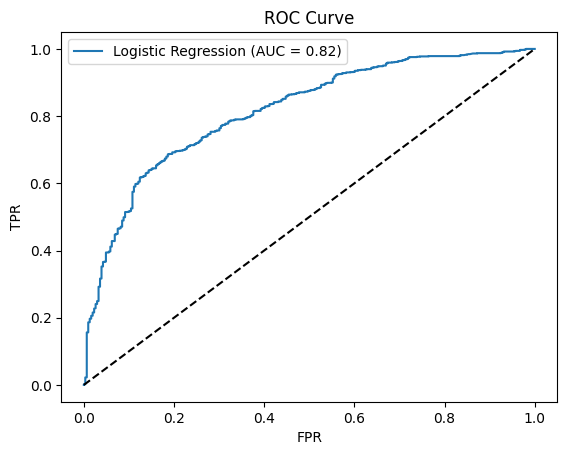

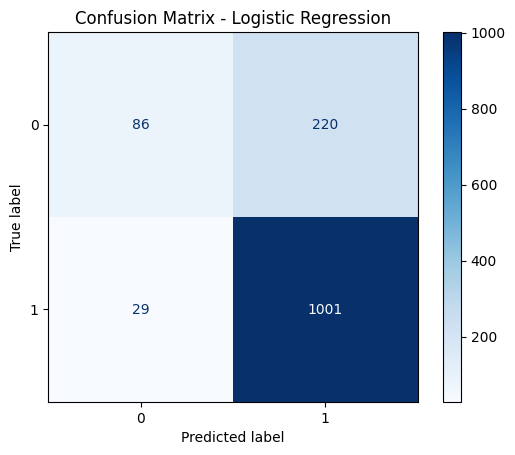

In [16]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)
y_proba_lr = lr.predict_proba(x_test_scaled)[:,1]

# Evaluation
print("Model: Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"ROC_AUC_Score: {roc_auc_score(y_test, y_proba_lr):.2f}")
print(f"Counfusion Matrix:\n {confusion_matrix(y_test, y_pred_lr)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_lr)}")

# ROC Curve
roc_auc = roc_auc_score(y_test, y_proba_lr)
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve"); plt.legend()
plt.show()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr),
                              display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Model: Random Forest
Accuracy: 0.79
ROC_AUC_Score: 0.77
Counfusion Matrix:
 [[117 189]
 [ 90 940]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.38      0.46       306
           1       0.83      0.91      0.87      1030

    accuracy                           0.79      1336
   macro avg       0.70      0.65      0.66      1336
weighted avg       0.77      0.79      0.78      1336



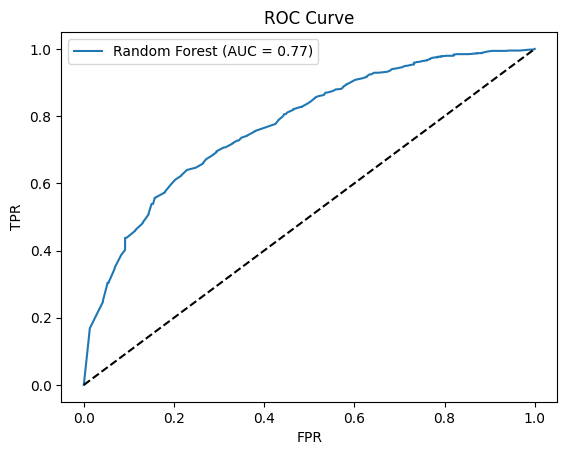

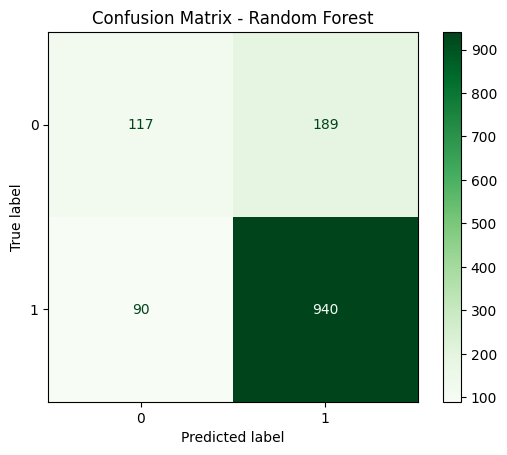

In [19]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:,1]

# Evaluation
print("Model: Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"ROC_AUC_Score: {roc_auc_score(y_test, y_proba_rf):.2f}")
print(f"Counfusion Matrix:\n {confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_rf)}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve"); plt.legend()
plt.show()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf),
                              display_labels=rf.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

Model: XGBoost
Accuracy: 0.81
ROC_AUC_Score: 0.82
Counfusion Matrix:
 [[126 180]
 [ 73 957]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.41      0.50       306
           1       0.84      0.93      0.88      1030

    accuracy                           0.81      1336
   macro avg       0.74      0.67      0.69      1336
weighted avg       0.79      0.81      0.80      1336



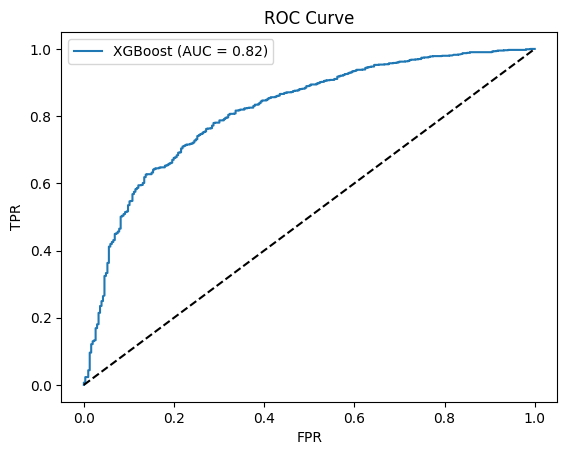

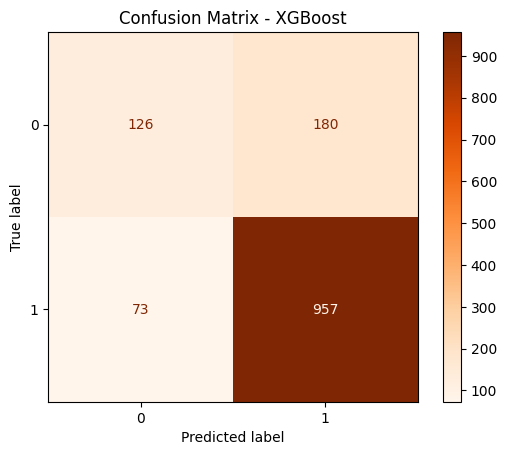

In [21]:
# XGBoost
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
y_proba_xgb = xgb.predict_proba(x_test)[:,1]

# Evaluation
print("Model: XGBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"ROC_AUC_Score: {roc_auc_score(y_test, y_proba_xgb):.2f}")
print(f"Counfusion Matrix:\n {confusion_matrix(y_test, y_pred_xgb)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_xgb)}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve"); plt.legend()
plt.show()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb),
                              display_labels=xgb.classes_)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix - XGBoost")
plt.show()

Model: Decision Tree
Accuracy: 0.74
ROC_AUC_Score: 0.66
Counfusion Matrix:
 [[154 152]
 [192 838]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.50      0.47       306
           1       0.85      0.81      0.83      1030

    accuracy                           0.74      1336
   macro avg       0.65      0.66      0.65      1336
weighted avg       0.75      0.74      0.75      1336



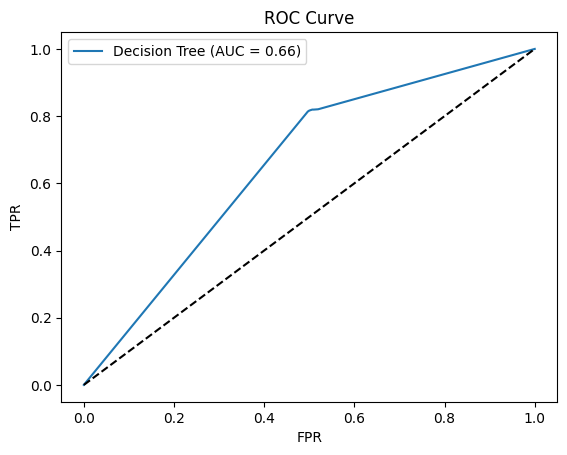

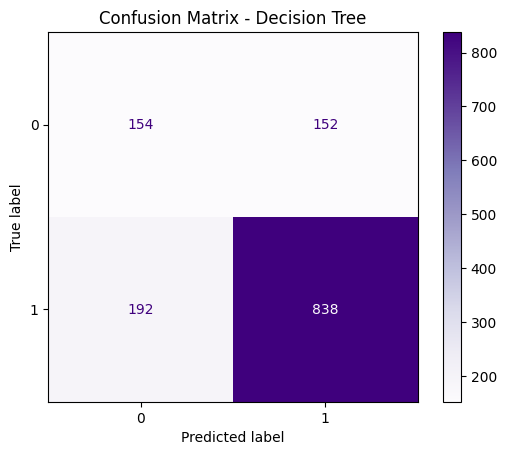

In [23]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
y_proba_dt = dt.predict_proba(x_test)[:,1]

# Evaluation
print("Model: Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"ROC_AUC_Score: {roc_auc_score(y_test, y_proba_dt):.2f}")
print(f"Counfusion Matrix:\n {confusion_matrix(y_test, y_pred_dt)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_dt)}")

# ROC Curve
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve"); plt.legend()
plt.show()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt),
                              display_labels=dt.classes_)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Model: Support Vector Machine
Accuracy: 0.81
ROC_AUC_Score: 0.73
Confusion Matrix:
 [[  83  223]
 [  28 1002]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.27      0.40       306
           1       0.82      0.97      0.89      1030

    accuracy                           0.81      1336
   macro avg       0.78      0.62      0.64      1336
weighted avg       0.80      0.81      0.78      1336



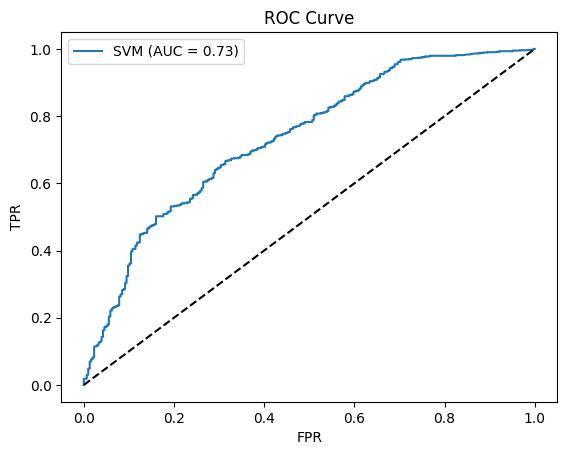

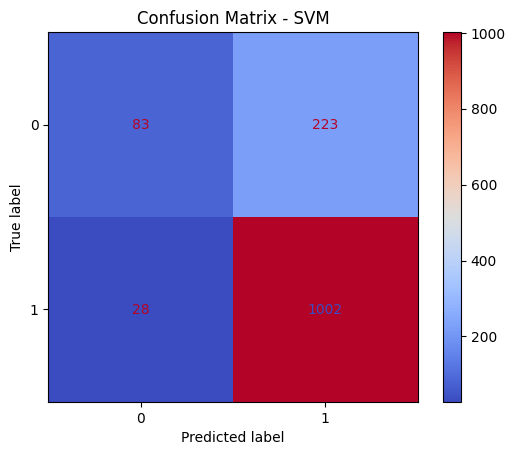

In [24]:
# Support Vector Machine (SVM)
svm = SVC(kernel='rbf', probability=True)
svm.fit(x_train_scaled, y_train)
y_pred_svm = svm.predict(x_test_scaled)
y_proba_svm = svm.predict_proba(x_test_scaled)[:,1]

# Evaluation
print("Model: Support Vector Machine")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"ROC_AUC_Score: {roc_auc_score(y_test, y_proba_svm):.2f}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_svm)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_svm)}")

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve"); plt.legend()
plt.show()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm),
                              display_labels=svm.classes_)
disp.plot(cmap='coolwarm')
plt.title("Confusion Matrix - SVM")
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Cross-Validated F1 Score: 0.8941 ± 0.0055

Accuracy: 0.81
ROC AUC: 0.82
Confusion Matrix:
 [[  85  221]
 [  30 1000]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.28      0.40       306
           1       0.82      0.97      0.89      1030

    accuracy                           0.81      1336
   macro avg       0.78      0.62      0.65      1336
weighted avg       0.80      0.81      0.78      1336



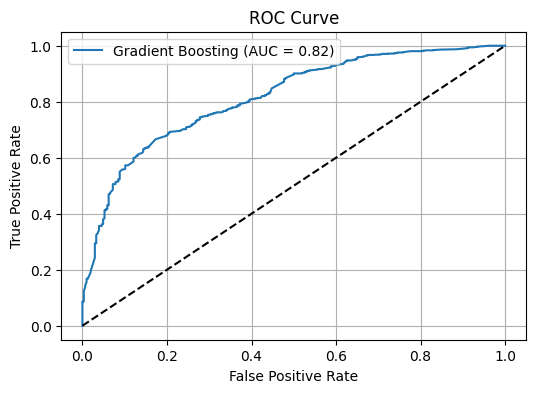

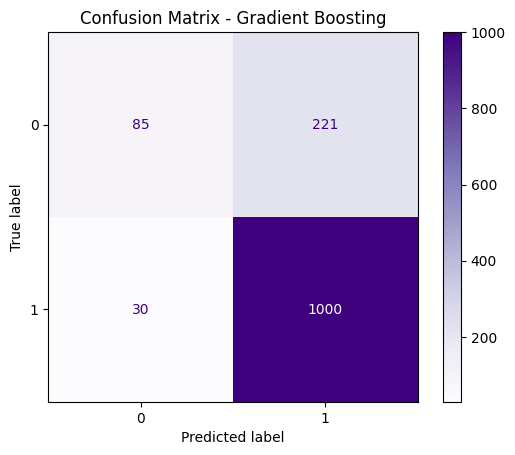

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=12)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
y_proba_gb = gb.predict_proba(x_test)[:,1]

# Evaluation
print("Model: Gradient Boosting")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.2f}")
print(f"ROC_AUC_Score: {roc_auc_score(y_test, y_proba_gb):.2f}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_gb)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_gb)}")

# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve"); plt.legend()
plt.show()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gb),
                              display_labels=gb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

Model: AdaBoost
Accuracy: 0.82
ROC_AUC_Score: 0.82
Confusion Matrix:
 [[  87  219]
 [  28 1002]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.28      0.41       306
           1       0.82      0.97      0.89      1030

    accuracy                           0.82      1336
   macro avg       0.79      0.63      0.65      1336
weighted avg       0.81      0.82      0.78      1336



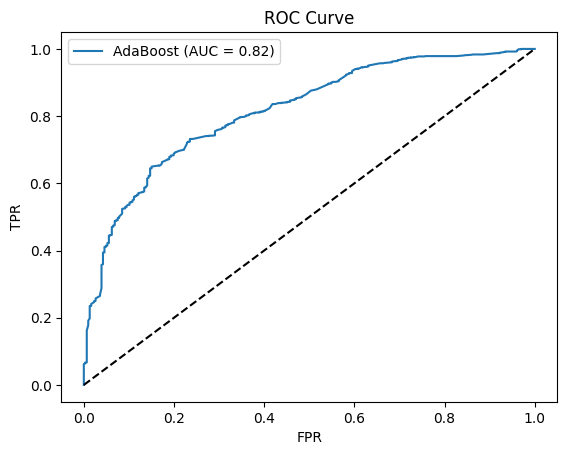

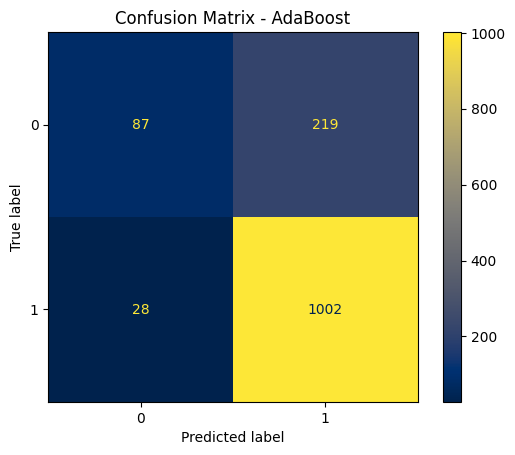

In [ ]:
# AdaBoost
ada = AdaBoostClassifier(random_state=2)
ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)
y_proba_ada = ada.predict_proba(x_test)[:,1]

# Evaluation
print("Model: AdaBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.2f}")
print(f"ROC_AUC_Score: {roc_auc_score(y_test, y_proba_ada):.2f}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_ada)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_ada)}")

# ROC Curve
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_proba_ada)
roc_auc_ada = roc_auc_score(y_test, y_proba_ada)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve"); plt.legend()
plt.show()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_ada),
                              display_labels=ada.classes_)
disp.plot(cmap='cividis')
plt.title("Confusion Matrix - AdaBoost")
plt.show()

Learning rate set to 0.021067
0:	learn: 0.6804365	total: 4.13ms	remaining: 4.13s
3:	learn: 0.6436090	total: 17.1ms	remaining: 4.25s
6:	learn: 0.6129975	total: 37.2ms	remaining: 5.28s
9:	learn: 0.5856338	total: 57.7ms	remaining: 5.72s
12:	learn: 0.5599459	total: 75.2ms	remaining: 5.71s
15:	learn: 0.5402585	total: 88.8ms	remaining: 5.46s
18:	learn: 0.5219104	total: 105ms	remaining: 5.4s
21:	learn: 0.5085430	total: 120ms	remaining: 5.33s
24:	learn: 0.4968417	total: 137ms	remaining: 5.34s
27:	learn: 0.4860518	total: 150ms	remaining: 5.21s
30:	learn: 0.4764630	total: 165ms	remaining: 5.15s
33:	learn: 0.4677990	total: 180ms	remaining: 5.11s
36:	learn: 0.4597602	total: 194ms	remaining: 5.06s
39:	learn: 0.4536511	total: 210ms	remaining: 5.04s
42:	learn: 0.4492216	total: 224ms	remaining: 4.99s
45:	learn: 0.4436856	total: 240ms	remaining: 4.97s
48:	learn: 0.4395984	total: 253ms	remaining: 4.92s
51:	learn: 0.4355655	total: 270ms	remaining: 4.92s
54:	learn: 0.4322390	total: 286ms	remaining: 4.91s


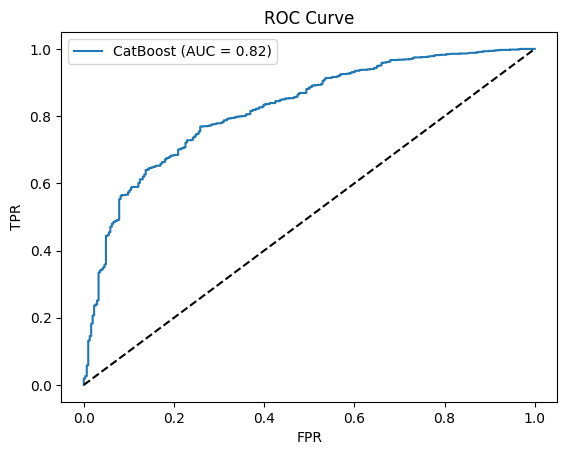

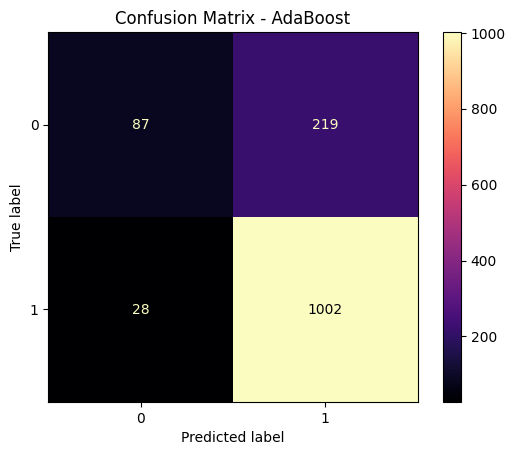

In [ ]:
# CatBoost
cat = CatBoostClassifier(verbose=3)
cat.fit(x_train, y_train)
y_pred_cat = cat.predict(x_test)
y_proba_cat = cat.predict_proba(x_test)[:,1]

# Evaluation
print("Model: CatBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cat):.2f}")
print(f"ROC_AUC_Score: {roc_auc_score(y_test, y_proba_cat):.2f}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_cat)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_cat)}")

# ROC Curve
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)
roc_auc_cat = roc_auc_score(y_test, y_proba_cat)
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {roc_auc_cat:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve"); plt.legend()
plt.show()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_ada),
                              display_labels=ada.classes_)
disp.plot(cmap='magma')
plt.title("Confusion Matrix - AdaBoost")
plt.show()

In [34]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Create an empty list to hold results
results = []

# Define a helper function to compute metrics
def evaluate_model(name, y_test, y_pred, y_proba):
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Collect metrics for each model
evaluate_model("Logistic Regression", y_test, y_pred_lr, y_proba_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt, y_proba_dt)
evaluate_model("SVM", y_test, y_pred_svm, y_proba_svm)
evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb, y_proba_xgb)
evaluate_model("Gradient Boosting", y_test, y_pred_gb, y_proba_gb)
evaluate_model("AdaBoost", y_test, y_pred_ada, y_proba_ada)
evaluate_model("CatBoost", y_test, y_pred_cat, y_proba_cat)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Sort by ROC AUC or any other metric if you like
results_df = results_df.sort_values(by="ROC AUC", ascending=False)

# Show table
print(results_df.round(2))

                 Model  Accuracy  ROC AUC  Precision  Recall  F1 Score
5    Gradient Boosting      0.82     0.83       0.82    0.97      0.89
7             CatBoost      0.82     0.82       0.83    0.96      0.89
6             AdaBoost      0.82     0.82       0.82    0.97      0.89
4              XGBoost      0.81     0.82       0.84    0.93      0.88
0  Logistic Regression      0.81     0.82       0.82    0.97      0.89
3        Random Forest      0.79     0.77       0.83    0.91      0.87
2                  SVM      0.81     0.73       0.82    0.97      0.89
1        Decision Tree      0.74     0.66       0.85    0.81      0.83


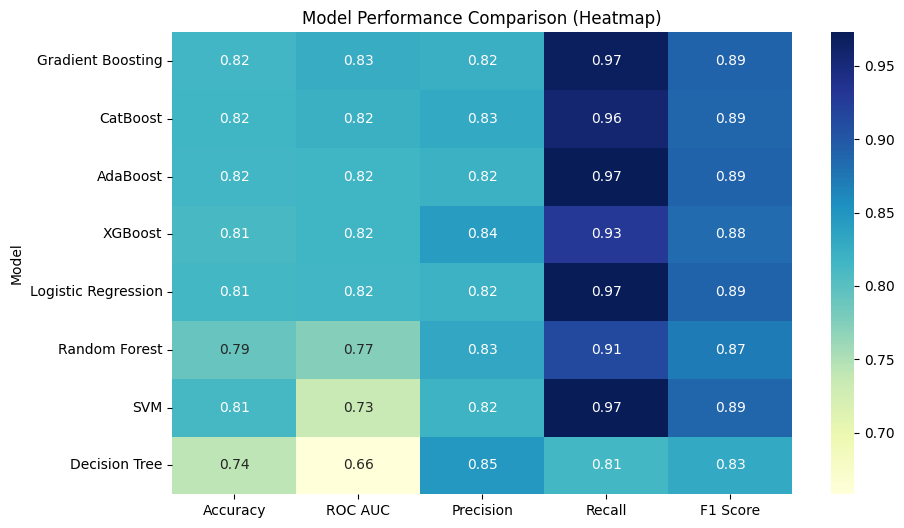

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Comparison (Heatmap)")
plt.show()

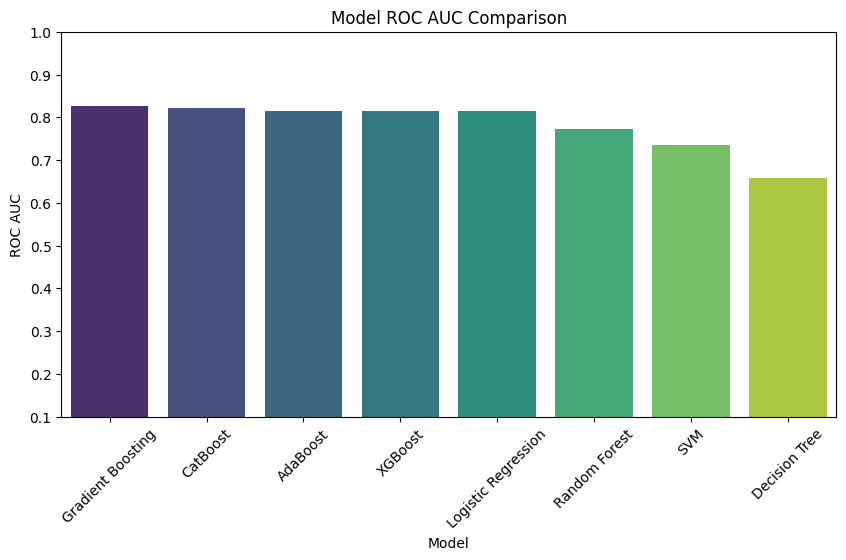

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="ROC AUC", palette="viridis")
plt.xticks(rotation=45)
plt.title("Model ROC AUC Comparison")
plt.ylim(0.1, 1) 
plt.show()

### Performance matrix 
| Model                | Accuracy | ROC AUC  | Precision | Recall   | F1 Score |
| -------------------- | -------- | -------- | --------- | -------- | -------- |
| HistGradientBoosting | **0.89** | **0.91** | **0.90**  | **0.97** | **0.93** |
| Gradient Boosting    | 0.82     | 0.83     | 0.82      | 0.97     | 0.89     |
| CatBoost             | 0.82     | 0.82     | 0.83      | 0.96     | 0.89     |
| AdaBoost             | 0.82     | 0.82     | 0.82      | 0.97     | 0.89     |
| XGBoost              | 0.81     | 0.82     | 0.84      | 0.93     | 0.88     |
| Logistic Regression  | 0.81     | 0.82     | 0.82      | 0.97     | 0.89     |
| SVM                  | 0.81     | 0.73     | 0.82      | 0.97     | 0.89     |
| Random Forest        | 0.79     | 0.77     | 0.83      | 0.91     | 0.87     |
| Decision Tree        | 0.74     | 0.66     | 0.85      | 0.81     | 0.83     |


---
### Top performer
---
| Model                    | Pros                                                                                                                       | Cons                                                                    | Verdict                                                               |
| ------------------------ | -------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------- | --------------------------------------------------------------------- |
| **HistGradientBoosting** | **Highest ROC AUC (0.91), highest F1 (0.93), best precision & recall**, handles missing values, faster than traditional GB | Requires clean numerical input (no categorical features unless encoded) | ⭐ **Best overall model — highly recommended for deployment**          |
| **Gradient Boosting**    | High recall (0.97), solid overall metrics (F1: 0.89)                                                                       | Lower ROC AUC (0.83), slower                                            | ✅ Strong model, but surpassed by HistGradientBoosting in performance  |
| **CatBoost**             | High precision (0.83), native handling of categorical features                                                             | Slightly lower ROC AUC (0.82)                                           | ✅ Great if you have categorical data — otherwise, stick to HistGB     |
| **AdaBoost**             | High recall (0.97), easy to interpret                                                                                      | Precision slightly lower                                                | ⚠️ Good option, but less commonly used in modern production pipelines |


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}

Cross-Validated Training Metrics:
Accuracy: 0.819
ROC AUC: 0.813
Precision: 0.831
Recall: 0.962
F1 Score: 0.891

Test Set Metrics:
Accuracy: 0.819
ROC AUC: 0.825
Precision: 0.827
Recall: 0.967
F1 Score: 0.892

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.32      0.45       306
           1       0.83      0.97      0.89      1030

    accuracy                           0.82      1336
   macro avg       0.78      0.64      0.67      1336
weighted avg       0.81      0.82      0.79      1336



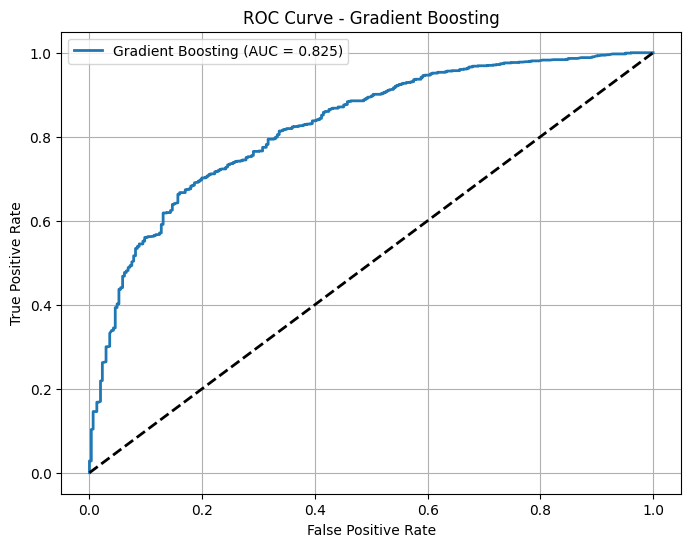

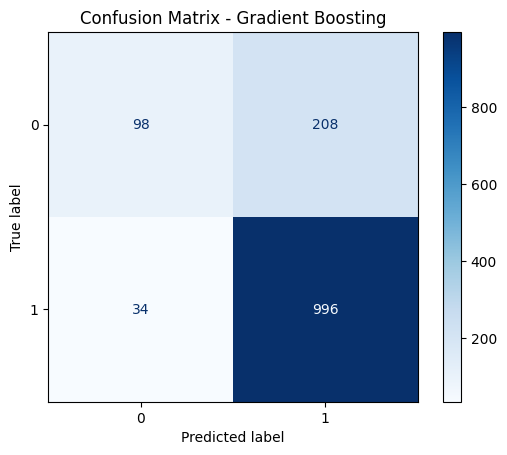

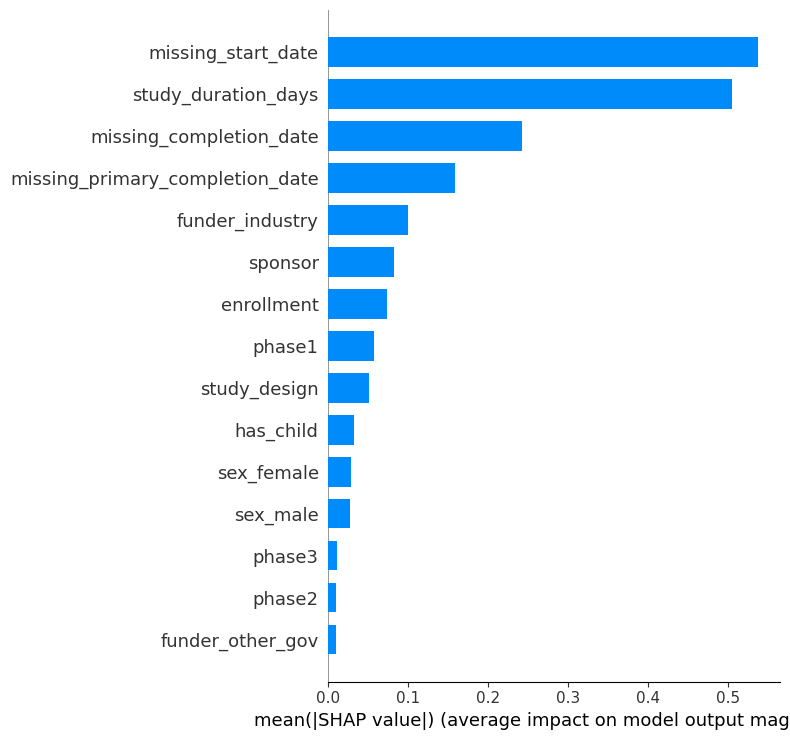

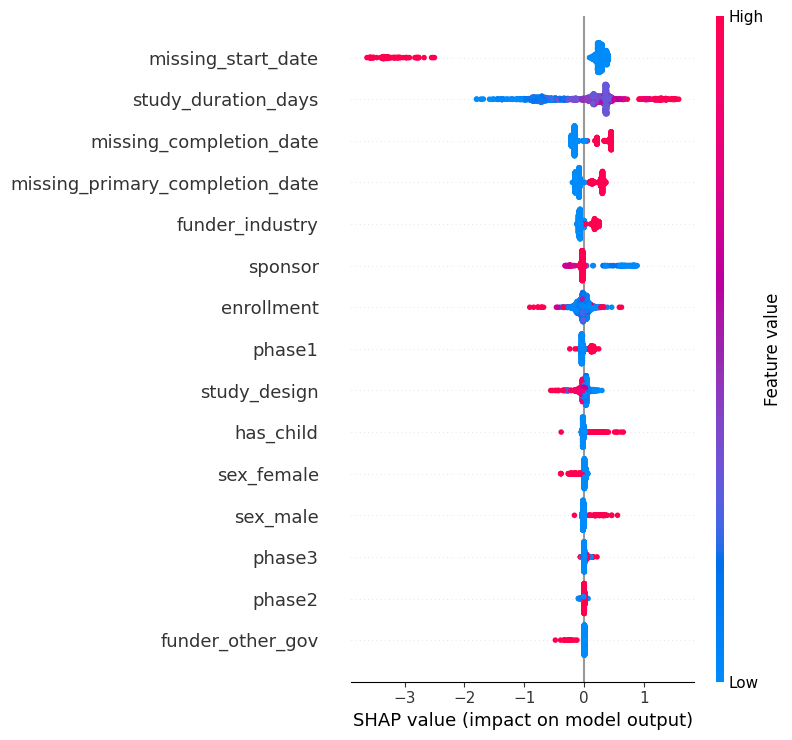

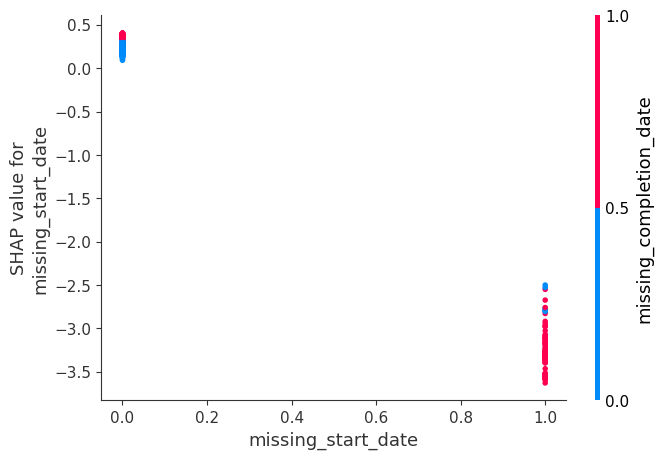

In [7]:

# --- Step 1: Define model and hyperparameter grid ---

gb = GradientBoostingClassifier(random_state=12)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0]
}

# --- Step 2: Setup Stratified K-Fold cross-validation ---

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

# --- Step 3: GridSearchCV for hyperparameter tuning ---

grid_search = GridSearchCV(estimator=gb,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='roc_auc',  # optimize for ROC AUC
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Use the best estimator
best_gb = grid_search.best_estimator_

# --- Step 4: Cross-validated predictions (for robust evaluation) ---

# Predicted probabilities for ROC and other metrics
y_proba_cv = cross_val_predict(best_gb, x_train, y_train, cv=cv, method='predict_proba')[:,1]

# Predicted classes
y_pred_cv = (y_proba_cv >= 0.5).astype(int)

# Evaluate metrics on training data with CV predictions
acc = accuracy_score(y_train, y_pred_cv)
roc_auc = roc_auc_score(y_train, y_proba_cv)
prec = precision_score(y_train, y_pred_cv)
rec = recall_score(y_train, y_pred_cv)
f1 = f1_score(y_train, y_pred_cv)

print("\nCross-Validated Training Metrics:")
print(f"Accuracy: {acc:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

# --- Step 5: Final evaluation on test set ---

y_pred_test = best_gb.predict(x_test)
y_proba_test = best_gb.predict_proba(x_test)[:,1]

print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_test):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_test):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_test):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_test):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# --- Step 6: ROC Curve visualization ---

fpr, tpr, _ = roc_curve(y_test, y_proba_test)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_proba_test):.3f})', lw=2)
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

# --- Step 7: Confusion matrix visualization ---

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test), display_labels=best_gb.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# --- Step 8: SHAP explainability ---

# Use TreeExplainer (CPU-safe)
explainer = shap.TreeExplainer(best_gb)
shap_values = explainer.shap_values(x_test)

# SHAP summary plot (global feature importance)
plt.figure(figsize=(10,8))
shap.summary_plot(shap_values, x_test, plot_type='bar', max_display=15, show=True)

# SHAP detailed summary (beeswarm)
plt.figure(figsize=(12,8))
shap.summary_plot(shap_values, x_test, max_display=15)

# Optional: SHAP dependence plot for top feature
top_feature = x_test.columns[np.abs(shap_values).mean(axis=0).argmax()]
shap.dependence_plot(top_feature, shap_values, x_test)

In [18]:
# Ensure all data is numeric for SHAP
x_test_clean = x_test.copy()

# Convert all columns to numeric (coerce errors to NaN)
x_test_clean = x_test_clean.apply(pd.to_numeric, errors='coerce')

# Fill any NaNs (optional, depending on your preference)
x_test_clean = x_test_clean.fillna(0)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'min_samples_leaf': 50, 'max_leaf_nodes': 15, 'max_iter': 200, 'max_depth': 4, 'learning_rate': 0.05}

Cross-Validated Training Metrics:
Accuracy: 0.82
ROC AUC: 0.81
Precision: 0.83
Recall: 0.97
F1 Score: 0.89

Test Set Metrics:
Accuracy: 0.82
ROC AUC: 0.82
Precision: 0.82
Recall: 0.97
F1 Score: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.30      0.43       306
           1       0.82      0.97      0.89      1030

    accuracy                           0.82      1336
   macro avg       0.78      0.63      0.66      1336
weighted avg       0.81      0.82      0.78      1336



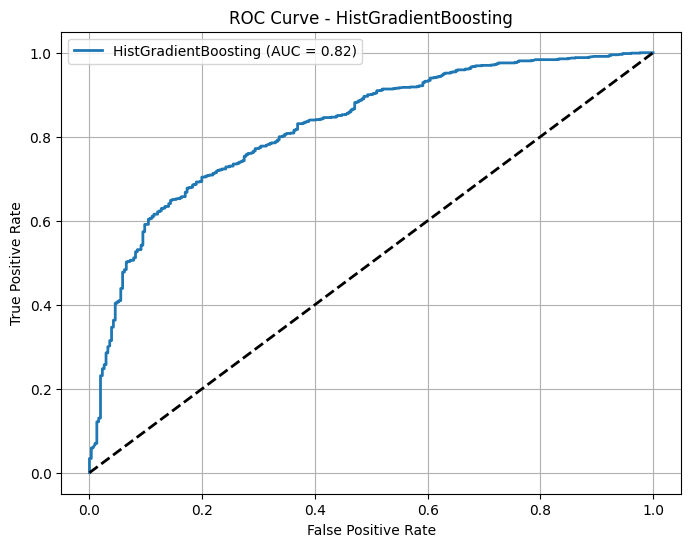

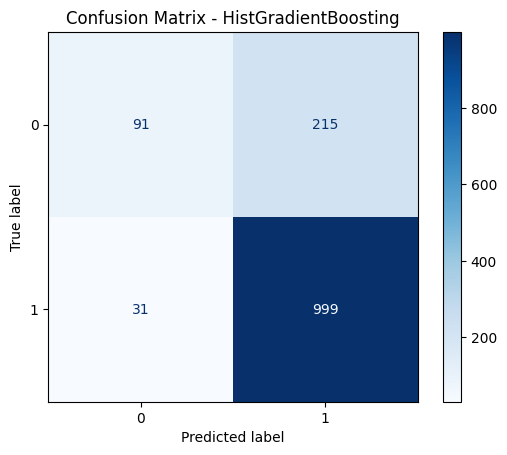

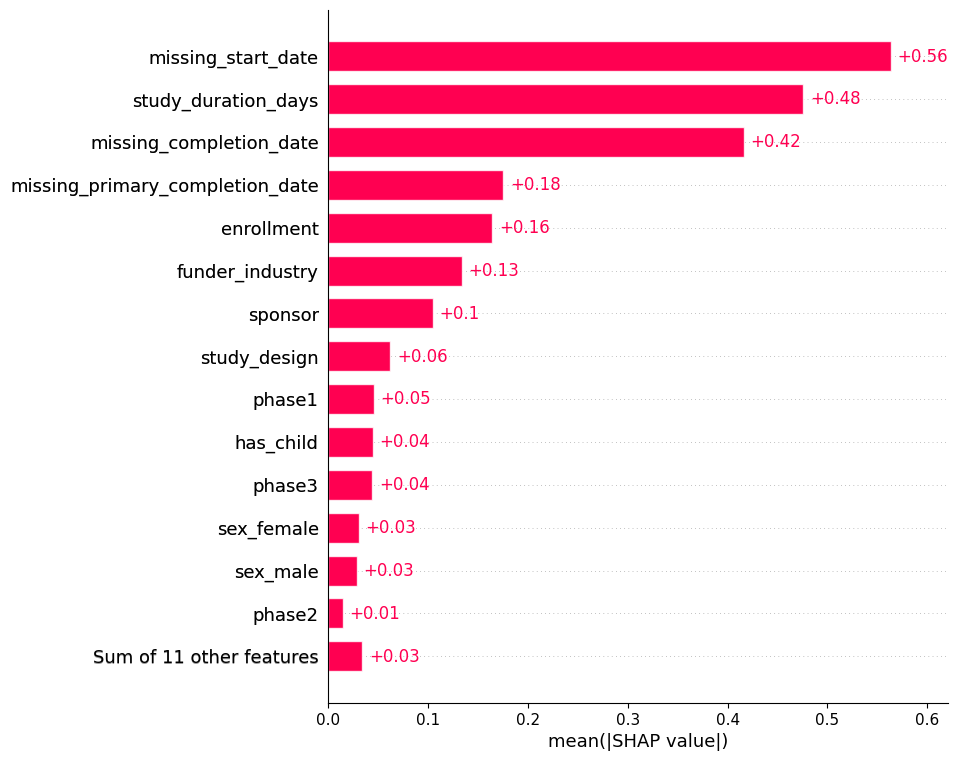

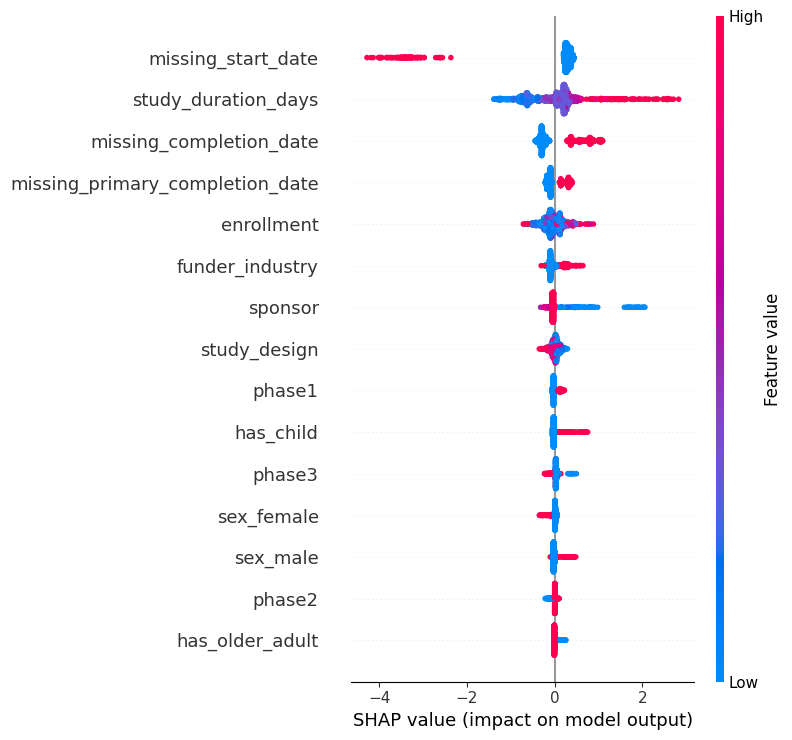

In [ ]:
# Define model and hyperparameter grid 

from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=12)

param_grid = {
    'max_iter': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [20, 50],
    'max_leaf_nodes': [15, 31]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

random_search = RandomizedSearchCV(
    estimator=hgb,
    param_distributions=param_grid,
    n_iter=20, 
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=12
)
random_search.fit(x_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
best_hgb = random_search.best_estimator_

y_proba_cv = cross_val_predict(best_hgb, x_train, y_train, cv=cv, method='predict_proba')[:, 1]
y_pred_cv = (y_proba_cv >= 0.5).astype(int)

acc = accuracy_score(y_train, y_pred_cv)
roc_auc = roc_auc_score(y_train, y_proba_cv)
prec = precision_score(y_train, y_pred_cv)
rec = recall_score(y_train, y_pred_cv)
f1 = f1_score(y_train, y_pred_cv)

print("\nCross-Validated Training Metrics:")
print(f"Accuracy: {acc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

y_pred_test = best_hgb.predict(x_test)
y_proba_test = best_hgb.predict_proba(x_test)[:, 1]

print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_test):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_test):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_test):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

fpr, tpr, _ = roc_curve(y_test, y_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'HistGradientBoosting (AUC = {roc_auc_score(y_test, y_proba_test):.2f})', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - HistGradientBoosting')
plt.legend()
plt.grid(True)
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test), display_labels=best_hgb.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - HistGradientBoosting')
plt.show()

# SHAP explainability ---

explainer = shap.Explainer(best_hgb)
shap_values = explainer(x_test)

plt.figure(figsize=(10, 8))
shap.plots.bar(shap_values, max_display=15)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, x_test, max_display=15)


In [8]:
df_model.columns

Index(['study_status', 'sponsor', 'enrollment', 'study_type', 'study_design',
       'study_duration_days', 'sex_all', 'sex_female', 'sex_male', 'has_child',
       'has_adult', 'has_older_adult', 'phase1', 'phase2', 'phase3',
       'funder_fed', 'funder_indiv', 'funder_industry', 'funder_network',
       'funder_nih', 'funder_other', 'funder_other_gov', 'funder_unknown',
       'missing_start_date', 'missing_primary_completion_date',
       'missing_completion_date'],
      dtype='object')

In [ ]:
# --- Hyperparameter grid for AdaBoost ---
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Initialize AdaBoost model
ada = AdaBoostClassifier(random_state=2)

# Stratified K-Fold Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Grid Search with CV for hyperparameter tuning
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Best model after tuning
best_ada = grid_search.best_estimator_

# Cross-validation scores to evaluate stability
cv_scores = cross_val_score(best_ada, x_train, y_train, cv=cv, scoring='roc_auc')
print(f"Cross-Validation ROC AUC scores: {cv_scores}")
print(f"Mean CV ROC AUC: {cv_scores.mean():.4f} | Std: {cv_scores.std():.4f}")

# Train on full training set with best params
best_ada.fit(x_train, y_train)

# Predict on test set
y_pred_ada = best_ada.predict(x_test)
y_proba_ada = best_ada.predict_proba(x_test)[:, 1]

# Evaluation Metrics
print("\nModel: AdaBoost (Optimized)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_ada):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_ada)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_ada)}")

# ROC Curve Visualization
fpr, tpr, _ = roc_curve(y_test, y_proba_ada)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc_score(y_test, y_proba_ada):.4f})', lw=2)
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Confusion Matrix Visualization
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_ada), display_labels=best_ada.classes_)
disp.plot(cmap='cividis')
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# --- SHAP explainability ---
# Use KernelExplainer for AdaBoost (slower, approximate)
explainer = shap.KernelExplainer(best_ada.predict_proba, shap.sample(x_train, 100))
shap_values = explainer.shap_values(x_test)

# Summary plot
shap.summary_plot(shap_values, x_test, plot_type="bar", show=True)

# Dependence plot for the most important feature
important_feature = x_test.columns[np.abs(shap_values).mean(axis=0).argmax()]
shap.dependence_plot(important_feature, shap_values, x_test, show=True)

Best Hyperparameters (CatBoost): {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Cross-Validation ROC AUC scores: [0.82872682 0.79568379 0.80903861 0.81977831 0.82570486]
Mean CV ROC AUC: 0.8158 | Std: 0.0121

Model: CatBoost (Optimized)
Accuracy: 0.8136
ROC AUC Score: 0.8186
Confusion Matrix:
[[ 93 213]
 [ 36 994]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.30      0.43       306
           1       0.82      0.97      0.89      1030

    accuracy                           0.81      1336
   macro avg       0.77      0.63      0.66      1336
weighted avg       0.80      0.81      0.78      1336



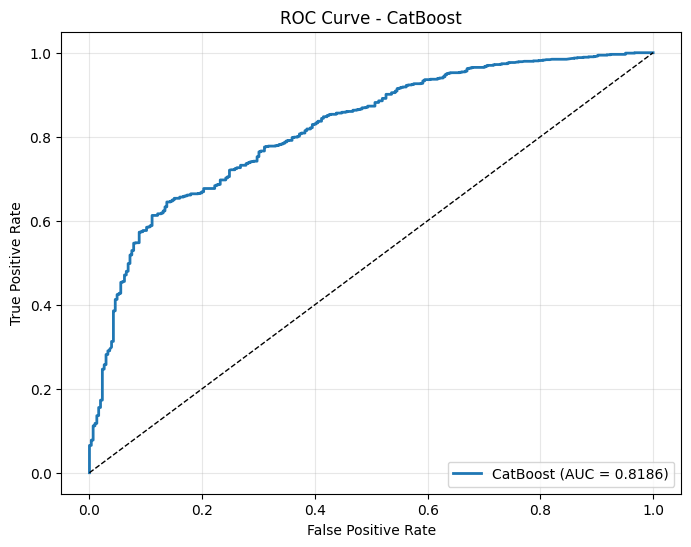

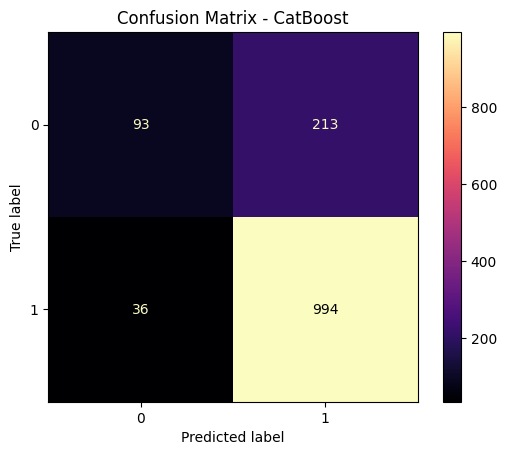

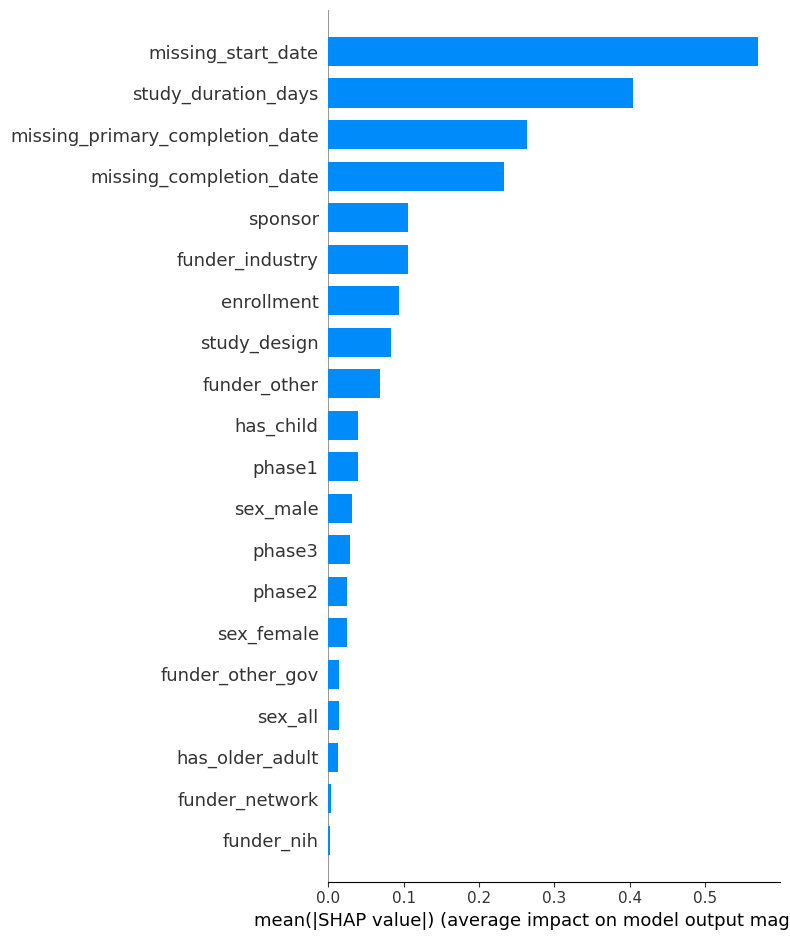

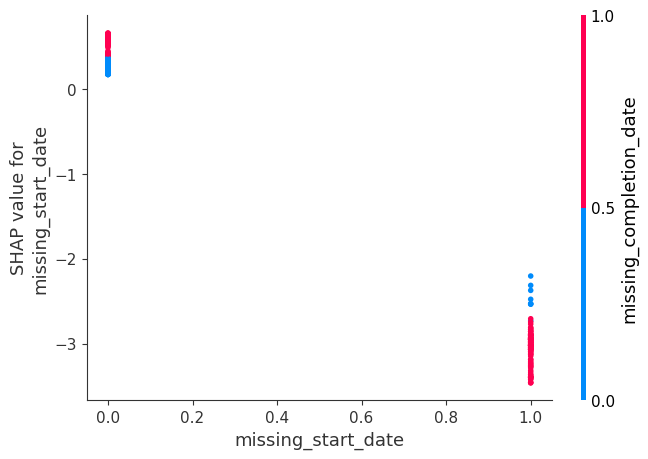

In [11]:
# Hyperparameter grid for CatBoost
param_grid_cat = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize CatBoost model (silent for GridSearch)
cat = CatBoostClassifier(verbose=0, random_seed=2)

# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# GridSearchCV with CatBoost
grid_search_cat = GridSearchCV(estimator=cat, param_grid=param_grid_cat, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search_cat.fit(x_train, y_train)

print("Best Hyperparameters (CatBoost):", grid_search_cat.best_params_)

# Best model from GridSearch
best_cat = grid_search_cat.best_estimator_

# Cross-validation ROC AUC for stability check
cv_scores_cat = cross_val_score(best_cat, x_train, y_train, cv=cv, scoring='roc_auc')
print(f"Cross-Validation ROC AUC scores: {cv_scores_cat}")
print(f"Mean CV ROC AUC: {cv_scores_cat.mean():.4f} | Std: {cv_scores_cat.std():.4f}")

# Train best model on full training data
best_cat.fit(x_train, y_train)

# Predictions
y_pred_cat = best_cat.predict(x_test)
y_proba_cat = best_cat.predict_proba(x_test)[:, 1]

# Evaluation
print("\nModel: CatBoost (Optimized)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cat):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_cat):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_cat)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_cat)}")

# ROC Curve Plot
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)
plt.figure(figsize=(8,6))
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {roc_auc_score(y_test, y_proba_cat):.4f})', lw=2)
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Confusion Matrix Visualization
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_cat), display_labels=best_cat.classes_)
disp.plot(cmap='magma')
plt.title("Confusion Matrix - CatBoost")
plt.show()

# SHAP explainability
explainer_cat = shap.TreeExplainer(best_cat)
shap_values_cat = explainer_cat.shap_values(x_test)

# SHAP summary bar plot
shap.summary_plot(shap_values_cat, x_test, plot_type="bar", show=True)

# SHAP dependence plot on top feature
important_feature_cat = x_test.columns[np.abs(shap_values_cat).mean(axis=0).argmax()]
shap.dependence_plot(important_feature_cat, shap_values_cat, x_test, show=True)

In [9]:
import joblib
joblib.dump(best_gb, 'gradient_boost_model.pkl')

['gradient_boost_model.pkl']

In [10]:
import joblib

model = joblib.load("E:/CareNova_patient_matching/notebook/gradient_boost_model.pkl")
print(model.feature_names_in_)

['sponsor' 'enrollment' 'study_type' 'study_design' 'study_duration_days'
 'sex_all' 'sex_female' 'sex_male' 'has_child' 'has_adult'
 'has_older_adult' 'phase1' 'phase2' 'phase3' 'funder_fed' 'funder_indiv'
 'funder_industry' 'funder_network' 'funder_nih' 'funder_other'
 'funder_other_gov' 'funder_unknown' 'missing_start_date'
 'missing_primary_completion_date' 'missing_completion_date']
